In [1]:
# import the libraries
import pandas as pd
import numpy as np
from pandas import datetime

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

C:\Users\deepusuresh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.


In [11]:
# Get the data

df = pd.read_csv("HistoricalQuotes.csv", index_col='Date', parse_dates=True)
df.head()

Close/Last     Volume      Open      High       Low
Date                                                           
2020-02-28     $273.36  106721200   $257.26   $278.41   $256.37
2020-02-27     $273.52   80151380    $281.1      $286   $272.96
2020-02-26     $292.65   49678430   $286.53   $297.88    $286.5
2020-02-25     $288.08   57668360   $300.95   $302.53   $286.13
2020-02-24     $298.18   55548830   $297.26   $304.18   $289.23

In [12]:
df.shape

(2518, 5)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2020-02-28 to 2010-03-01
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0    Close/Last  2518 non-null   object
 1    Volume      2518 non-null   int64 
 2    Open        2518 non-null   object
 3    High        2518 non-null   object
 4    Low         2518 non-null   object
dtypes: int64(1), object(4)
memory usage: 118.0+ KB


In [14]:
# Cleaning data

df = df.rename(columns={' Close/Last':'Close', ' Volume':'Volume', ' Open': 'Open', ' High':'High', ' Low':'Low'})
df['Close'] = df['Close'].str.replace('$', '').astype('float')
df['Open'] = df['Open'].str.replace('$', '').astype('float')
df['High'] = df['High'].str.replace('$', '').astype('float')
df['Low'] = df['Low'].str.replace('$', '').astype('float')
df.head()

Close     Volume    Open    High     Low
Date                                                 
2020-02-28  273.36  106721200  257.26  278.41  256.37
2020-02-27  273.52   80151380  281.10  286.00  272.96
2020-02-26  292.65   49678430  286.53  297.88  286.50
2020-02-25  288.08   57668360  300.95  302.53  286.13
2020-02-24  298.18   55548830  297.26  304.18  289.23

In [15]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(df.corr(), annot=True, cmap='summer')

In [16]:
sns.pairplot(df, kind='reg')

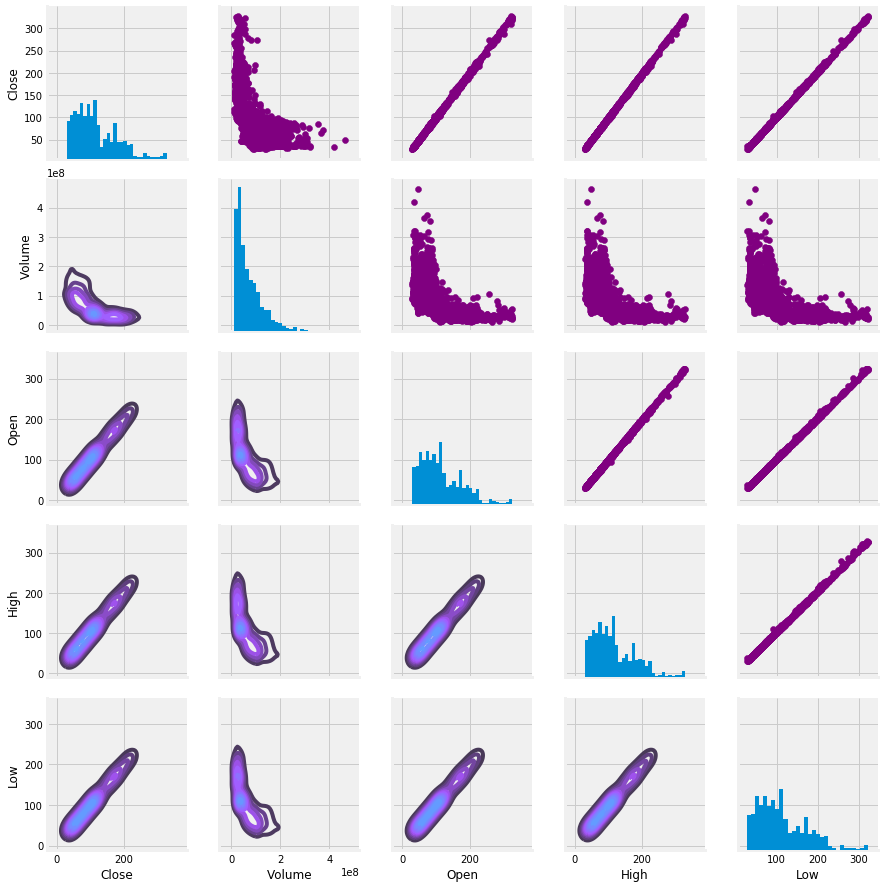

In [17]:
return_fig = sns.PairGrid(df.dropna())
return_fig.map_upper(plt.scatter, color='purple')
return_fig.map_lower(sns.kdeplot, cmap='cool_d')
return_fig.map_diag(plt.hist, bins=30)

### SMA (Simple Moving Average)

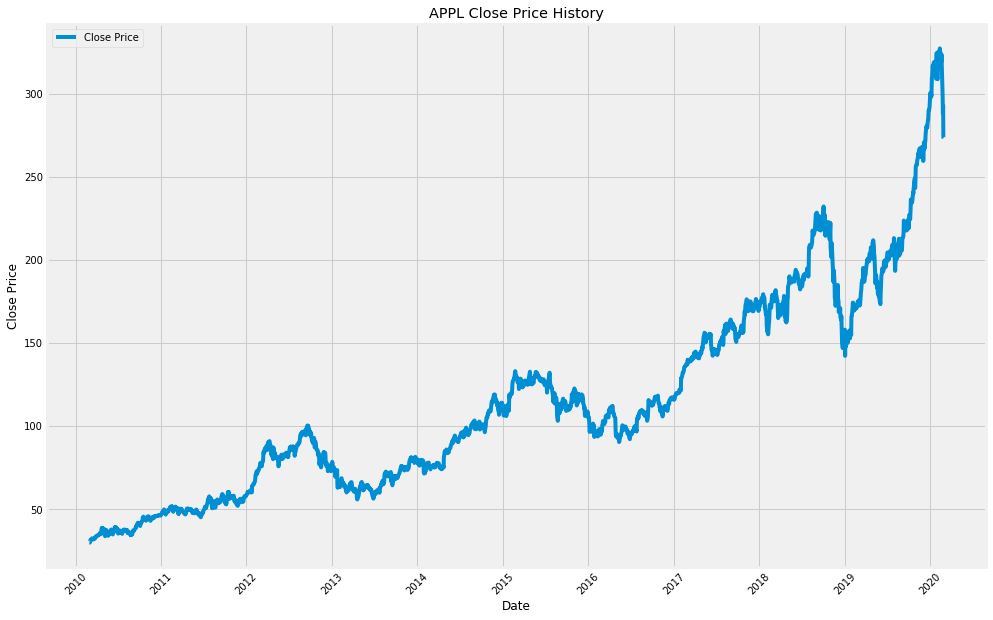

In [18]:
# Visually show the stock price
plt.figure(figsize=(15,10))
plt.plot(df['Close'], label='Close Price', alpha=1)
plt.title('APPL Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.show()

In [19]:
# Create the simple moving average with a 30 days window
SMA30 = pd.DataFrame()
SMA30['Close'] = df['Close'].rolling(window=30).mean()
SMA30

Close
Date                 
2020-02-28        NaN
2020-02-27        NaN
2020-02-26        NaN
2020-02-25        NaN
2020-02-24        NaN
...               ...
2010-03-05  33.160150
2010-03-04  32.985437
2010-03-03  32.796913
2010-03-02  32.621483
2010-03-01  32.462247

[2518 rows x 1 columns]

In [20]:
# Create the simple moving average with a 100 days window
SMA100 = pd.DataFrame()
SMA100['Close'] = df['Close'].rolling(window=100).mean()
SMA100

Close
Date                 
2020-02-28        NaN
2020-02-27        NaN
2020-02-26        NaN
2020-02-25        NaN
2020-02-24        NaN
...               ...
2010-03-05  35.609611
2010-03-04  35.533368
2010-03-03  35.462011
2010-03-02  35.389025
2010-03-01  35.317548

[2518 rows x 1 columns]

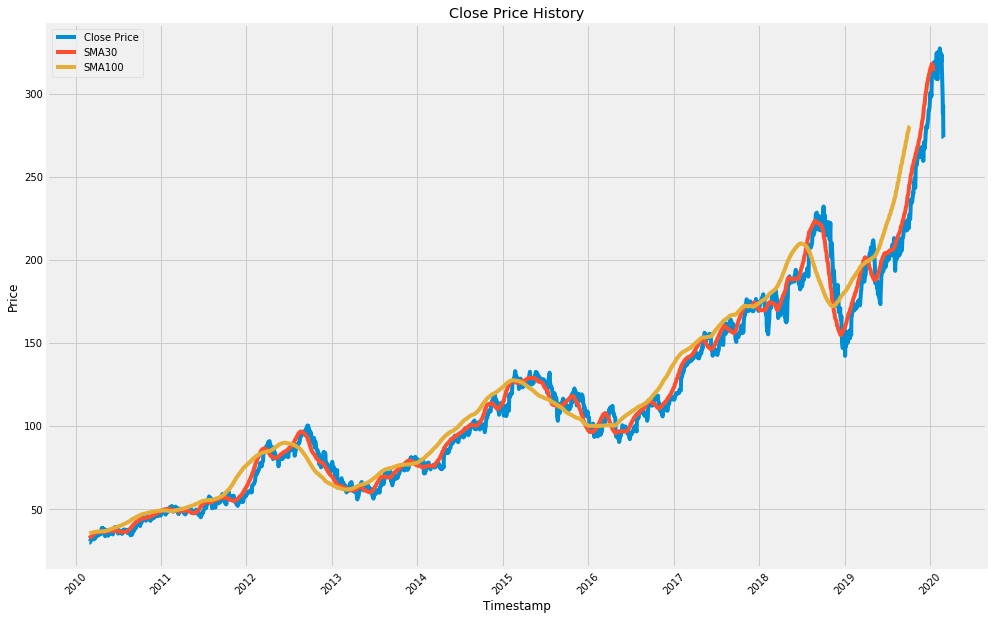

In [21]:
# Visually show the stock price
plt.figure(figsize=(15,10))
plt.plot(df['Close'], label='Close Price')
plt.plot(SMA30['Close'], label='SMA30')
plt.plot(SMA100['Close'], label='SMA100')
plt.title('Close Price History')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

### Money Flow Index

In [22]:
# Calculate typical price
typical_price = (df['Close'] + df['High'] + df['Low']) / 3
typical_price

Date
2020-02-28    269.380000
2020-02-27    277.493333
2020-02-26    292.343333
2020-02-25    292.246667
2020-02-24    297.196667
                 ...    
2010-03-05     31.108567
2010-03-04     30.012367
2010-03-03     29.863800
2010-03-02     29.877133
2010-03-01     29.711433
Length: 2518, dtype: float64

In [23]:
# Get the period
period = 14

# Calculate the money flow
money_flow = typical_price * df['Volume']
money_flow

Date
2020-02-28    2.874856e+10
2020-02-27    2.224147e+10
2020-02-26    1.452316e+10
2020-02-25    1.685339e+10
2020-02-24    1.650893e+10
                  ...     
2010-03-05    6.988459e+09
2010-03-04    2.688865e+09
2010-03-03    2.772749e+09
2010-03-02    4.227205e+09
2010-03-01    4.079738e+09
Length: 2518, dtype: float64

In [24]:
# Get all of the positive and negative money flows

positive_flow = []
negative_flow = []

# Loop through the typical price
for i in range(1, len(typical_price)):
    if typical_price[i] > typical_price[i-1]:
        positive_flow.append(money_flow[i-1])
        negative_flow.append(0)
        
    elif typical_price[i] < typical_price[i-1]:
        negative_flow.append(money_flow[i-1])
        positive_flow.append(0)
        
    else:
        positive_flow.append(0)
        negative_flow.append(0)

In [25]:
# Get all of the positive and negative money flows within the time period

positive_mf = []
negative_mf = []

for i in range(period-1, len(positive_flow)):
    positive_mf.append( sum(positive_flow[i + 1- period : i+1]))
    
for i in range(period-1, len(negative_flow)):
    negative_mf.append( sum(negative_flow[i + 1- period : i+1]))

In [26]:
# Calculate the money flow index
MFI = 100 * (np.array(positive_mf) / (np.array(positive_mf) + np.array(negative_mf) ))
MFI

array([77.96211622, 75.255007  , 66.95112332, ..., 18.96468262,
       24.58882059, 24.33398304])

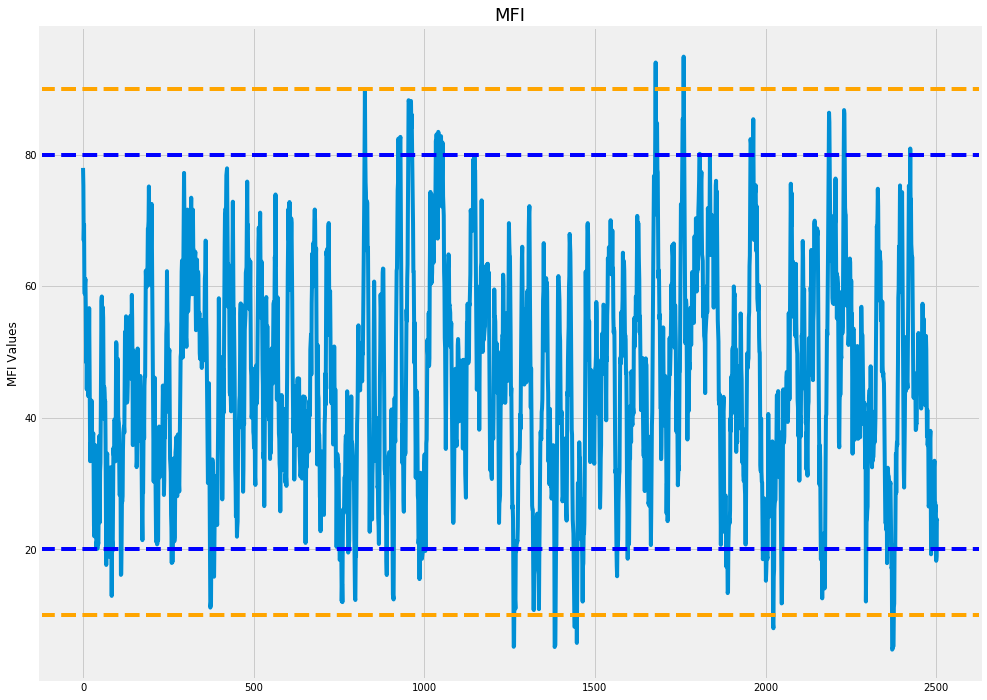

In [27]:
# Visually show the MFI
df2 = pd.DataFrame()
df2['MFI'] = MFI

# Create the plot

plt.figure(figsize=(15,12))
plt.plot(df2['MFI'], label='MFI')
plt.axhline(10, linestyle= '--', color='orange')
plt.axhline(20, linestyle= '--', color='blue')
plt.axhline(80, linestyle= '--', color='blue')
plt.axhline(90, linestyle= '--', color='orange')
plt.title('MFI', fontsize=18)
plt.ylabel('MFI Values')
plt.show()

In [28]:
# Create a new Dataframe

new_df = pd.DataFrame()
new_df = df[period:]
new_df['MFI'] = MFI

# Show the new dataframe

new_df

Close     Volume      Open      High       Low        MFI
Date                                                                    
2020-02-07  320.0300   29421010  322.3700  323.4000  318.0000  77.962116
2020-02-06  325.2100   26356390  322.5700  325.2200  320.2648  75.255007
2020-02-05  321.4500   29706720  323.5200  324.7600  318.9500  66.951123
2020-02-04  318.8500   34154130  315.3100  319.6400  313.6345  69.349951
2020-02-03  308.6600   43496400  304.3000  313.4900  302.2200  59.784076
...              ...        ...       ...       ...       ...        ...
2010-03-05   31.2786  224647427   30.7057   31.3857   30.6614  26.676586
2010-03-04   30.1014   89591907   29.8971   30.1314   29.8043  18.277453
2010-03-03   29.9043   92846488   29.8486   29.9814   29.7057  18.964683
2010-03-02   29.8357  141486282   29.9900   30.1186   29.6771  24.588821
2010-03-01   29.8557  137312041   29.3928   29.9286   29.3500  24.333983

[2504 rows x 6 columns]

In [29]:
def get_signal(data, high, low):
    buy_signal = []
    sell_signal = []
          
    for i in range(len(data['MFI'])):
        if data['MFI'][i] > high:
            buy_signal.append(np.nan)
            sell_signal.append(data['Close'][i])
          
        elif data['MFI'][i] < low:
       
            buy_signal.append(data['Close'][i])
            sell_signal.append(np.nan)
          
        else:
            sell_signal.append(np.nan)
            buy_signal.append(np.nan)
      

    return (buy_signal, sell_signal)

In [30]:
# Add new columns (Buy and Sell)

new_df['Buy'] = get_signal(new_df, 80, 20)[0]
new_df['Sell'] = get_signal(new_df, 80, 20)[1]

# Show the data

new_df

Close     Volume      Open      High       Low        MFI  \
Date                                                                       
2020-02-07  320.0300   29421010  322.3700  323.4000  318.0000  77.962116   
2020-02-06  325.2100   26356390  322.5700  325.2200  320.2648  75.255007   
2020-02-05  321.4500   29706720  323.5200  324.7600  318.9500  66.951123   
2020-02-04  318.8500   34154130  315.3100  319.6400  313.6345  69.349951   
2020-02-03  308.6600   43496400  304.3000  313.4900  302.2200  59.784076   
...              ...        ...       ...       ...       ...        ...   
2010-03-05   31.2786  224647427   30.7057   31.3857   30.6614  26.676586   
2010-03-04   30.1014   89591907   29.8971   30.1314   29.8043  18.277453   
2010-03-03   29.9043   92846488   29.8486   29.9814   29.7057  18.964683   
2010-03-02   29.8357  141486282   29.9900   30.1186   29.6771  24.588821   
2010-03-01   29.8557  137312041   29.3928   29.9286   29.3500  24.333983   

                Buy  Sell  
Date                       
2020-02-07      NaN   NaN  
2020-02-06      NaN   NaN  
2020-02-05      NaN   NaN  
2020-02-04      NaN   NaN  
2020-02-03      NaN   NaN  
...             ...   ...  
2010-03-05      NaN   NaN  
2010-03-04  30.1014   NaN  
2010-03-03  29.9043   NaN  
2010-03-02      NaN   NaN  
2010-03-01      NaN   NaN  

[2504 rows x 8 columns]

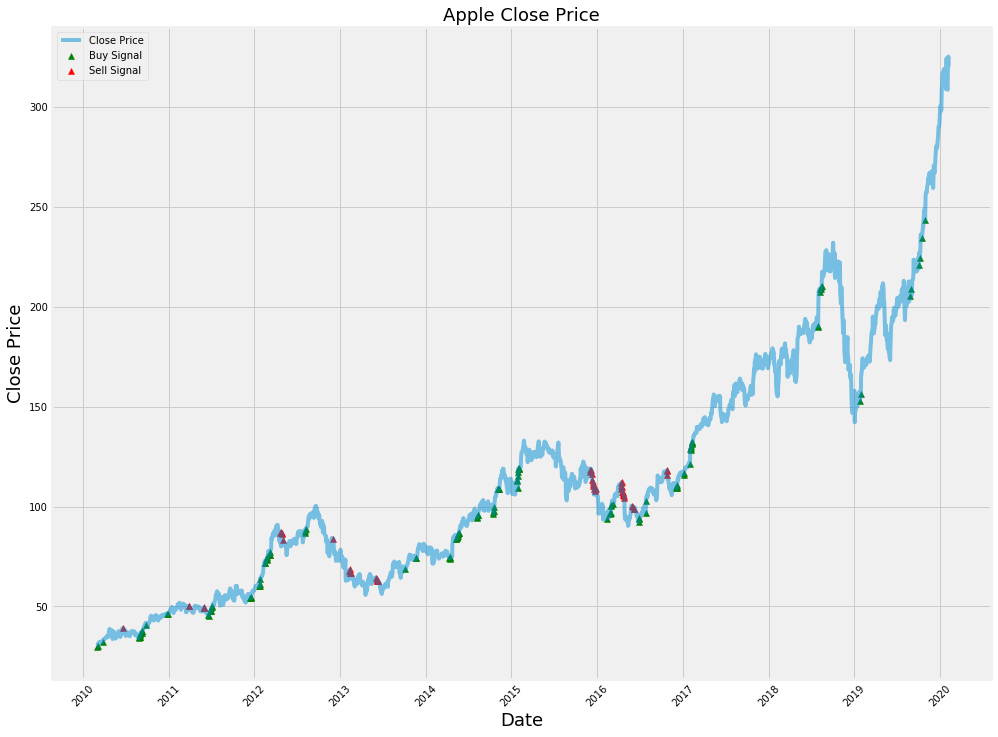

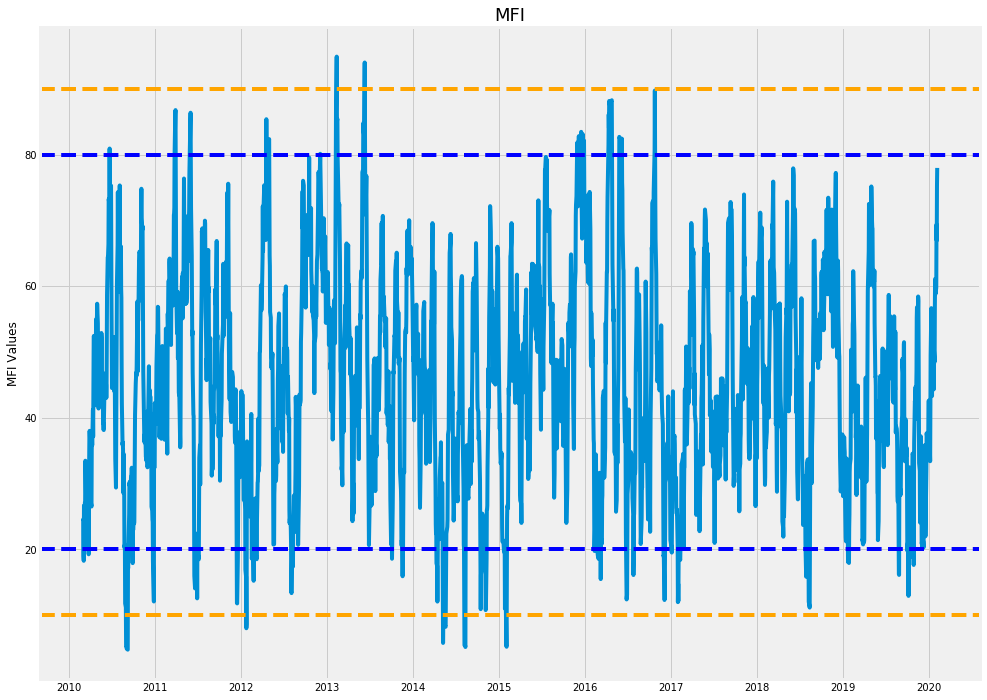

In [31]:
# Plot the data

plt.figure(figsize=(15,12))
plt.plot(new_df['Close'], label='Close Price', alpha=0.5)
plt.scatter(new_df.index, new_df['Buy'], label='Buy Signal', color='green', marker='^', alpha=1)
plt.scatter(new_df.index, new_df['Sell'], label='Sell Signal', color='red', marker='^', alpha=1)
plt.title('Apple Close Price', fontsize=18)
plt.xticks(rotation=45)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.legend(loc='upper left')
plt.show()

# Create the plot

plt.figure(figsize=(15,12))
plt.plot(new_df['MFI'], label='MFI')
plt.axhline(10, linestyle= '--', color='orange')
plt.axhline(20, linestyle= '--', color='blue')
plt.axhline(80, linestyle= '--', color='blue')
plt.axhline(90, linestyle= '--', color='orange')
plt.title('MFI', fontsize=18)
plt.ylabel('MFI Values')
plt.show()